In [1]:
import numpy as np

# Q1

In [7]:
def element_wise_comparison(array1, array2):
    """
    Perform element-wise comparisons between two NumPy arrays.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.

    Returns:
    - tuple: A tuple of NumPy arrays containing the following element-wise comparison results:
        - greater_result (numpy.ndarray): Element-wise greater than comparison.
        - greater_equal_result (numpy.ndarray): Element-wise greater than or equal to comparison.
        - less_result (numpy.ndarray): Element-wise less than comparison.
        - less_equal_result (numpy.ndarray): Element-wise less than or equal to comparison.
    """
    
    greater_result = array1 > array2
    greater_equal_result = array1 >= array2
    less_result = array1 < array2
    less_equal_result = array1 <= array2

    return greater_result, greater_equal_result, less_result, less_equal_result

In [4]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[1, 2], [2, 3]])

greater, greater_equal, less, less_equal = element_wise_comparison(array1, array2)

print("Greater than:")
print(greater)
print("\nGreater than or equal to:")
print(greater_equal)
print("\nLess than:")
print(less)
print("\nLess than or equal to:")
print(less_equal)

Greater than:
[[False False]
 [ True  True]]

Greater than or equal to:
[[ True  True]
 [ True  True]]

Less than:
[[False False]
 [False False]]

Less than or equal to:
[[ True  True]
 [False False]]


# Q2

In [8]:
def array_multiply(array1, array2, method="element-wise"):
    """
    Perform multiplication between two NumPy arrays using the specified method.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The multiplication method to use. Defaults to "element-wise".

    Returns:
    - numpy.ndarray: The result of the multiplication operation based on the chosen method.
    """
    if method == "element-wise":
        result = array1 * array2
    if method == "matrix-multiply":
        result = np.matmul(array1, array2)

    return result

In [9]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[2, 0], [1, 2]])

# Perform element-wise multiplication
element_wise_result = array_multiply(array1, array2, method="element-wise")
print("Element-wise multiplication:")
print(element_wise_result)

# Perform matrix multiplication
matrix_multiply_result = array_multiply(array1, array2, method="matrix-multiply")
print("\nMatrix multiplication:")
print(matrix_multiply_result)

Element-wise multiplication:
[[2 0]
 [3 8]]

Matrix multiplication:
[[ 4  4]
 [10  8]]


# Q3

In [3]:
def broadcast_add(p, q, method="row-wise"):
    """
    Perform addition between two NumPy arrays using broadcasting and the specified method.

    Parameters:
    - p (numpy.ndarray): First input NumPy array.
    - q (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The addition method to use. Defaults to "row-wise".
        - "row-wise": Perform row-wise addition, broadcasting q to match the number of rows in p.
        - "column-wise": Perform column-wise addition, adding q to each column of p.

    Returns:
    - numpy.ndarray: The result of the addition operation based on the chosen method.
    
    Raises:
    - ValueError: If an invalid method is provided or if the shapes are incompatible for the chosen method.
    """
    if method not in ["row-wise", "column-wise"]:
        raise ValueError("method name not recognized")
    if len(q.shape) != 1:
        raise ValueError("second parameter should be a vector")
    axis = 0 if method == "row-wise" else 1
    q = np.expand_dims(q, axis = axis)
    result = np.add(p,q)
    
    return result

In [8]:
# Example usage with different-shaped arrays
p = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
q = np.array([10, 20, 30])
print(len(q.shape))

# Add q row-wise to p
row_wise_result = broadcast_add(p, q, method="row-wise")
print("Row-wise addition:")
print(row_wise_result)

# Add q column-wise to p
column_wise_result = broadcast_add(p, q, method="column-wise")
print("\nColumn-wise addition:")
print(column_wise_result)

1
Row-wise addition:
[[11 22 33]
 [14 25 36]
 [17 28 39]]

Column-wise addition:
[[11 12 13]
 [24 25 26]
 [37 38 39]]


# Q4

In [12]:
# Initialize the random matrix
x = np.random.randint(1, 11, size=(4,4))

print("Original Array:")
print(x)

# Do the normalization
x = x / np.max(x)

print("After normalization:")
print(x)

Original Array:
[[ 6  4 10  2]
 [ 3  3  2  6]
 [ 2  6  8  9]
 [ 6  2  4  8]]
After normalization:
[[0.6 0.4 1.  0.2]
 [0.3 0.3 0.2 0.6]
 [0.2 0.6 0.8 0.9]
 [0.6 0.2 0.4 0.8]]


# Q5

-0.0021449644154760772
Average daily output: 0.0005548260008486606
Standarad deviation of daily output: 0.009442945103460245
Maximum daily output: ('11/9/2023', 0.02878633838810639)
Minimum daily output: ('4/16/2023', -0.028963574613605738)
Maximum Closing Price: ['11/29/2023' 124.6180108]
Minimum Closing Price: ['4/16/2023' 82.96821012]


Text(0.5, 1.0, 'Daily Output')

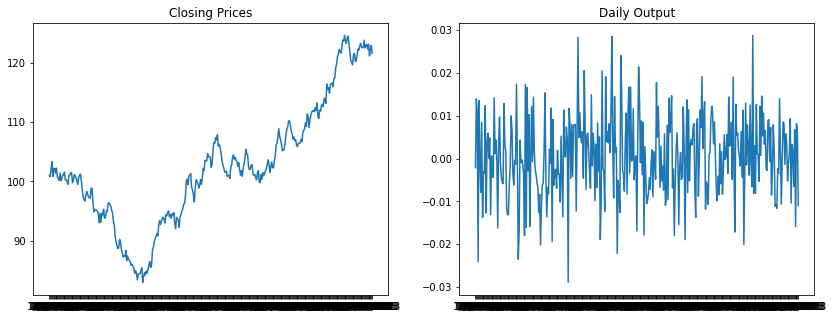

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("data.csv")
data = df.to_numpy()
daily_output = (data[1:][:,1] - data[:-1][:,1]) / data[:-1][:,1]
avg_daily_output = np.mean(daily_output)
std_daily_output = np.std(daily_output)
maximum_daily_outputs = data[np.argmax(daily_output)+1, 0],np.max(daily_output)
minimum_daily_outputs = data[np.argmin(daily_output)+1, 0],np.min(daily_output)
max_close_price = data[np.argmax(data[:,1])]
min_close_price = data[np.argmin(data[:,1])]
print(f"Average daily output: {avg_daily_output}")
print(f"Standarad deviation of daily output: {std_daily_output}")
print(f"Maximum daily output: {maximum_daily_outputs}")
print(f"Minimum daily output: {minimum_daily_outputs}")
print(f"Maximum Closing Price: {max_close_price}")
print(f"Minimum Closing Price: {min_close_price}")
# You should write your code here and print or plot the required data asked in homework documentation
figure, axis = plt.subplots(1, 2, figsize=(14,5)) 
axis[0].plot(data[:,0], data[:,1])
axis[0].set_title("Closing Prices")
axis[1].plot(data[1:,0], daily_output)
axis[1].set_title("Daily Output")

# Q6

In [24]:
def for_loop_feed_forward(X, w):
    """
    Perform a feed-forward operation using a for loop.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    outputs = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        sum_val = 0
        for j in range(w.shape[0]):
            sum_val += X[i,j]*w[j]
        outputs[i] = np.array([sum_val,])

    return outputs

def vectorized_feed_forward(X, w):
    """
    Perform a feed-forward operation using vectorization.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    outputs = np.dot(X,w)

    return outputs

In [25]:
import time

# generate random samples

X = np.random.uniform(0,256,size=(100,500))
w = np.random.uniform(0,1,size=(500,1))

start_time = time.time()
outputs = for_loop_feed_forward(X, w)

print("Time spent on calculating the outputs using for loops: ")
print(time.time() - start_time)

start_time = time.time()
outputs = vectorized_feed_forward(X, w)
print("Time spent on calculating the outputs using vectorization: ")
print(time.time() - start_time)

Time spent on calculating the outputs using for loops: 
0.18954896926879883
Time spent on calculating the outputs using vectorization: 
0.0


# Q7

In [26]:
def replace_elements_above_threshold(array, threshold):
    """
    Replace elements in a NumPy array that are higher than the given threshold with a specified value.

    Parameters:
    - array (numpy.ndarray): Input NumPy array.
    - threshold (float): Threshold value to compare elements with.

    Returns:
    - numpy.ndarray: NumPy array with elements replaced above the threshold.
    """
    modified_arr = np.zeros_like(array)
    modified_arr[array > threshold] = 1

    return modified_arr

In [27]:
input_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
threshold_value = 5
result_array = replace_elements_above_threshold(input_array, threshold_value)
print(result_array)

[[0 0 0]
 [0 0 1]
 [1 1 1]]


# Q8

In [3]:
class Matrix:
    def __init__(self, matrix):
        """
        Initialize a Matrix object with a given list of lists.

        Parameters:
        - matrix (list of lists): Input list of lists representing the matrix.
        """
        try:
            a = matrix[0][0]
        except:
            matrix = [matrix,]

        self.matrix = matrix

    def is_equal(self, second_matrix):
        """
        Check if this Matrix object is equal to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if the matrices are equal, False otherwise.
        """
        return self.matrix == second_matrix.matrix

    def is_higher_elementwise(self, second_matrix):
        """
        Check if this Matrix object has higher values element-wise compared to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - Matrix: Matrix same shape of the input.
        """
        assert len(self.matrix) == len(second_matrix.matrix)
        assert len(self.matrix[0]) == len(second_matrix.matrix[0])
        result = [[] for i in range(len(self.matrix))]
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                result[i].append(self.matrix[i][j] > second_matrix.matrix[i][j])
        return result
    
    def is_subset(self, second_matrix):
        """
        Check if this Matrix object is a subset of another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if this matrix is a subset of 'second_matrix', False otherwise.
        """
        rows, cols = len(self.matrix), len(self.matrix[0])
        for i in range(len(second_matrix.matrix) - rows + 1):
            for j in range(len(second_matrix.matrix[i]) - cols + 1):
                flag = 1
                for m in range(rows):
                    for n in range(cols):
                        if(self.matrix[m][n] != second_matrix.matrix[m+i][n+j]):
                            flag = 0
                if flag:
                    return True

        return False

    def dot_product(self, second_matrix):
        """
        Calculate the dot product between this Matrix object and another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for the dot product.

        Returns:
        - Matrix: The result of the dot product as a numpy.ndarray.
        """
        rows, cols = len(self.matrix), len(self.matrix[0])
        rows_sec, cols_sec = len(second_matrix.matrix), len(second_matrix.matrix[0])
        sec_matrix = second_matrix.matrix
        if cols != rows_sec:
            sec_matrix = second_matrix.convert_vertical()
        rows_sec, cols_sec = len(sec_matrix), len(sec_matrix[0])
        result = [[] for i in range(rows)]
        for i in range(rows):
            for j in range(cols_sec):
                sum_res = 0
                for k in range(cols):
                    sum_res += self.matrix[i][k] * sec_matrix[k][j]
                result[i].append(sum_res)
        if rows==1 and cols_sec==1:
            return result[0][0]        
        return result

    def convert_vertical(self):
        rows, cols = len(self.matrix), len(self.matrix[0])
        output = [[] for i in range(cols)]
        for i in range(cols):
            output[i].append(self.matrix[0][i])
        return output

In [4]:
matrix1 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

matrix2 = Matrix([[0, 0, 0], [4, 5, 6], [7, 8, 9]])

matrix3 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# test equality of matrices here and show the result #
print(matrix1.is_equal(matrix2))
print(matrix2.is_equal(matrix1))
print(matrix3.is_equal(matrix1))

False
False
True


In [37]:
matrix1 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = Matrix([[0, 0, 0], [4, 5, 6], [7, 8, 9]])
matrix3 = Matrix([[0, 0, 0], [10, 20, 30], [-1, 8, 10]])

# test proportion of matrices here and show the result #
print(matrix3.is_higher_elementwise(matrix1))
print(matrix3.is_higher_elementwise(matrix2))


[[False, False, False], [True, True, True], [False, False, True]]
[[False, False, False], [True, True, True], [False, False, True]]


In [38]:
matrix1 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix4 = Matrix([[5, 6], [8, 9]])
matrix5 = Matrix([[1, 2], [4, 5]])
matrix6 = Matrix([[1, 2], [3, 4]])


# test subset of matrices here and show the result #
print(matrix4.is_subset(matrix1))
print(matrix5.is_subset(matrix1))
print(matrix6.is_subset(matrix1))


True
True
False


In [36]:
matrix7 = Matrix([[3, 1], [2, 4], [-1, 5]])
matrix8 = Matrix([[3, 1], [2, 4]])
matrix9 = Matrix([2,4,6])
matrix10 = Matrix([2,4])
matrix11 = Matrix([1,2,3])

# test product of matrices here and show the result #
print(matrix7.dot_product(matrix8))
print(matrix9.dot_product(matrix7))
print(matrix7.dot_product(matrix10))
print(matrix9.dot_product(matrix11))


[[11, 7], [14, 18], [7, 19]]
[[8, 48]]
[[10], [20], [18]]
28
